In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Office & Administration Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,interest_in_discount_program,training_ID,trainer_name,training_total_meetings,training_price,discount_training,training_type,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,2,...,2,B0001,Alam,8,3000000,0,Office & Administration Series,Interactive Dashboard with Microsoft Excel,Managing General Affairs Excellence,Electronic Filing Management With Simple Datab...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,3,...,2,B0002,Reza,11,4000000,10,Office & Administration Series,Excel & Powerpoint For Powerful Business Appli...,Excel & Powerpoint For Powerful Business Appli...,Managing General Affairs Excellence
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,4,...,4,B0003,Haris,14,11000000,25,Office & Administration Series,Managing General Affairs Excellence,Electronic Filing Management With Simple Datab...,Powerful Database Analysis & Dashboard Reporti...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,2,...,3,B0004,Reza,11,11000000,10,Office & Administration Series,Excel & Powerpoint For Powerful Business Appli...,Excel & Powerpoint For Powerful Business Appli...,Managing General Affairs Excellence
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,5,B0005,Haris,17,11000000,50,Office & Administration Series,Powerful Database Analysis & Dashboard Reporti...,Secretary Development Program,Excel & Powerpoint For Powerful Business Appli...


## Univariatee Analysis

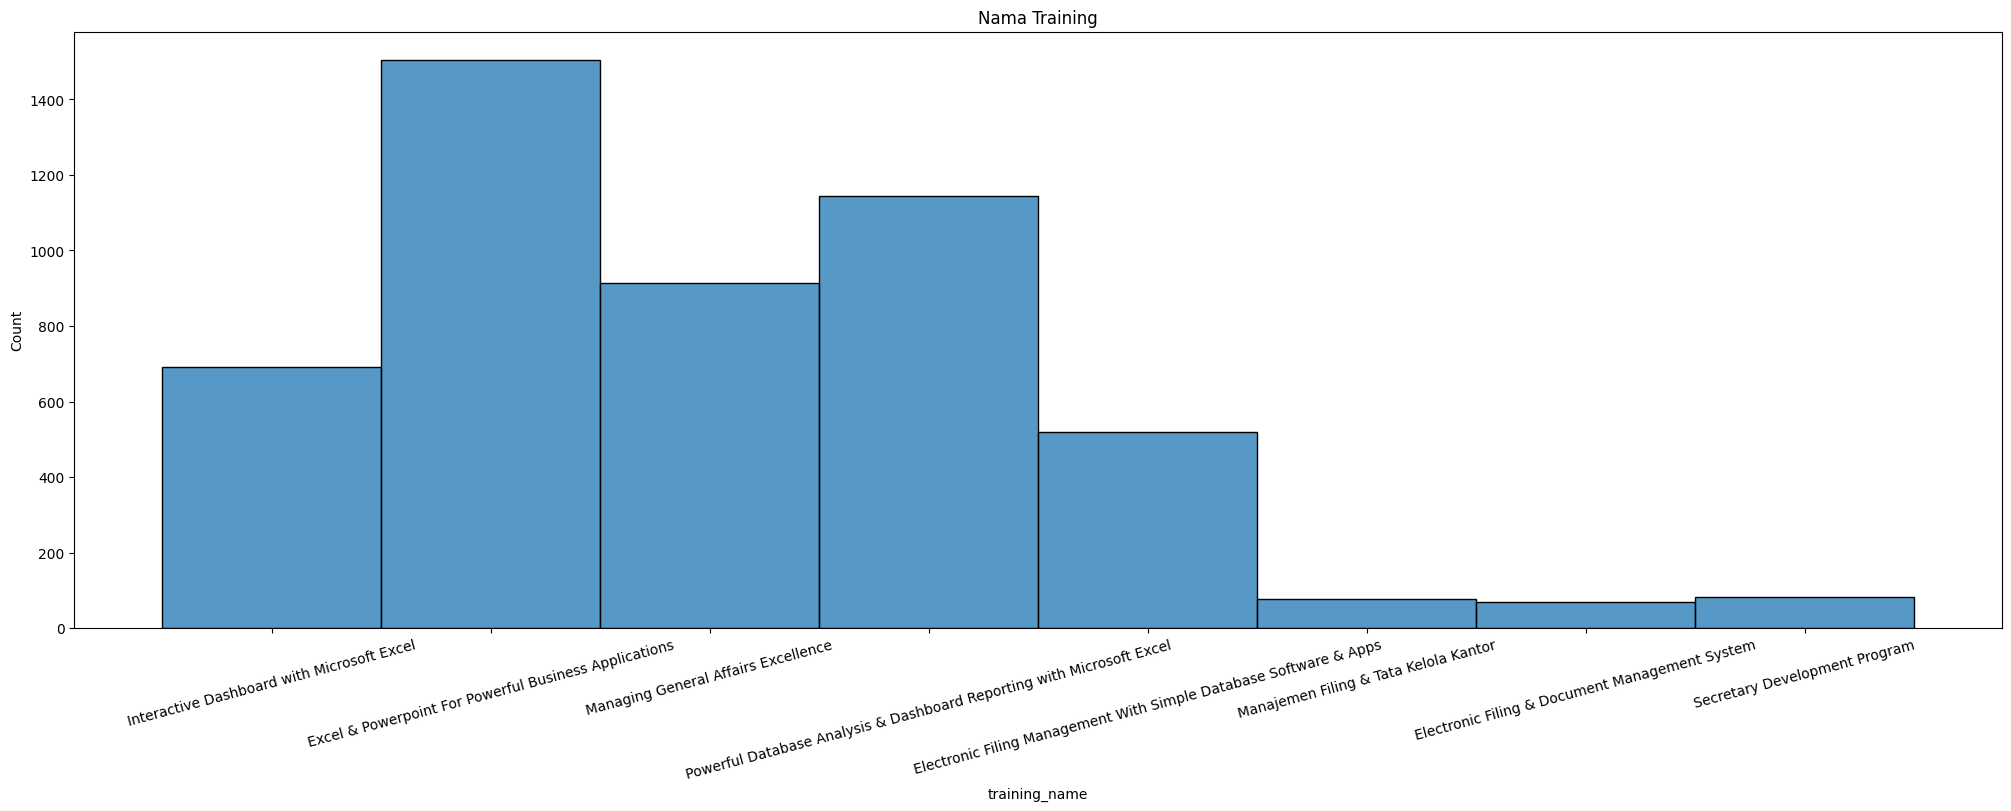

Excel & Powerpoint For Powerful Business Applications                    1504
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel    1145
Managing General Affairs Excellence                                       914
Interactive Dashboard with Microsoft Excel                                692
Electronic Filing Management With Simple Database Software & Apps         519
Secretary Development Program                                              82
Manajemen Filing & Tata Kelola Kantor                                      76
Electronic Filing & Document Management System                             68
Name: training_name, dtype: int64


In [3]:
# training_name
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["training_name"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["training_name"].value_counts())

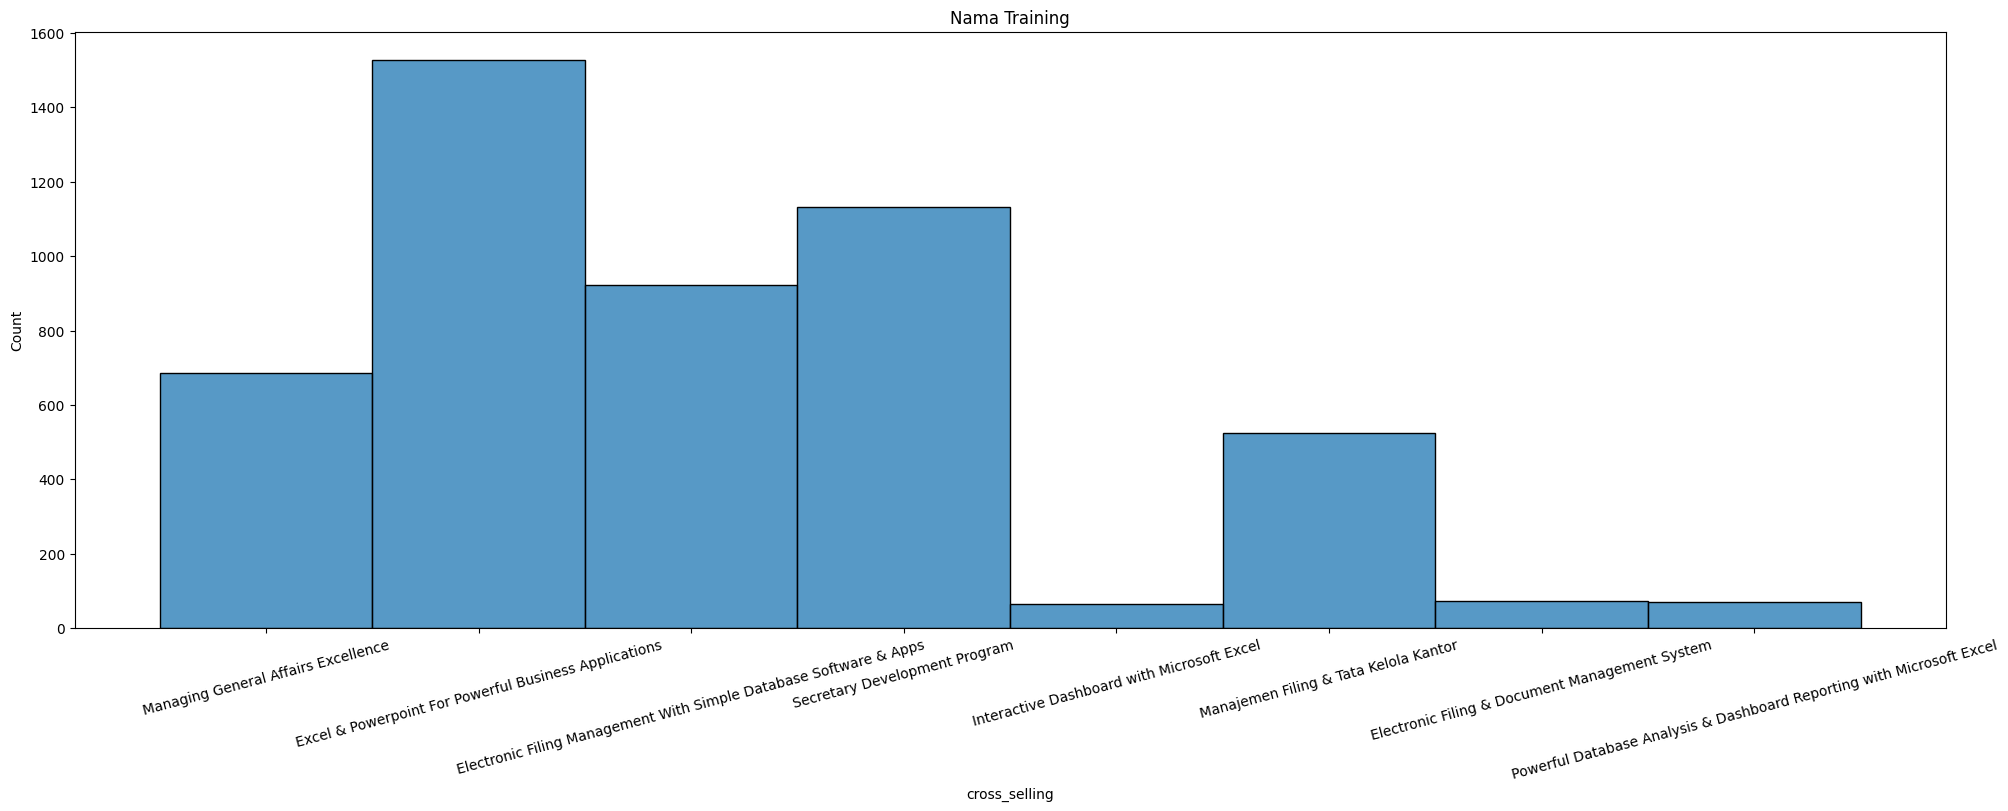

Excel & Powerpoint For Powerful Business Applications                    1527
Secretary Development Program                                            1133
Electronic Filing Management With Simple Database Software & Apps         923
Managing General Affairs Excellence                                       685
Manajemen Filing & Tata Kelola Kantor                                     525
Electronic Filing & Document Management System                             73
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel      69
Interactive Dashboard with Microsoft Excel                                 65
Name: cross_selling, dtype: int64


In [4]:
# Cross Selling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["cross_selling"], ax=ax)
ax.set_title("Nama Training")
plt.xticks(rotation=15)
plt.show()
print(df["cross_selling"].value_counts())

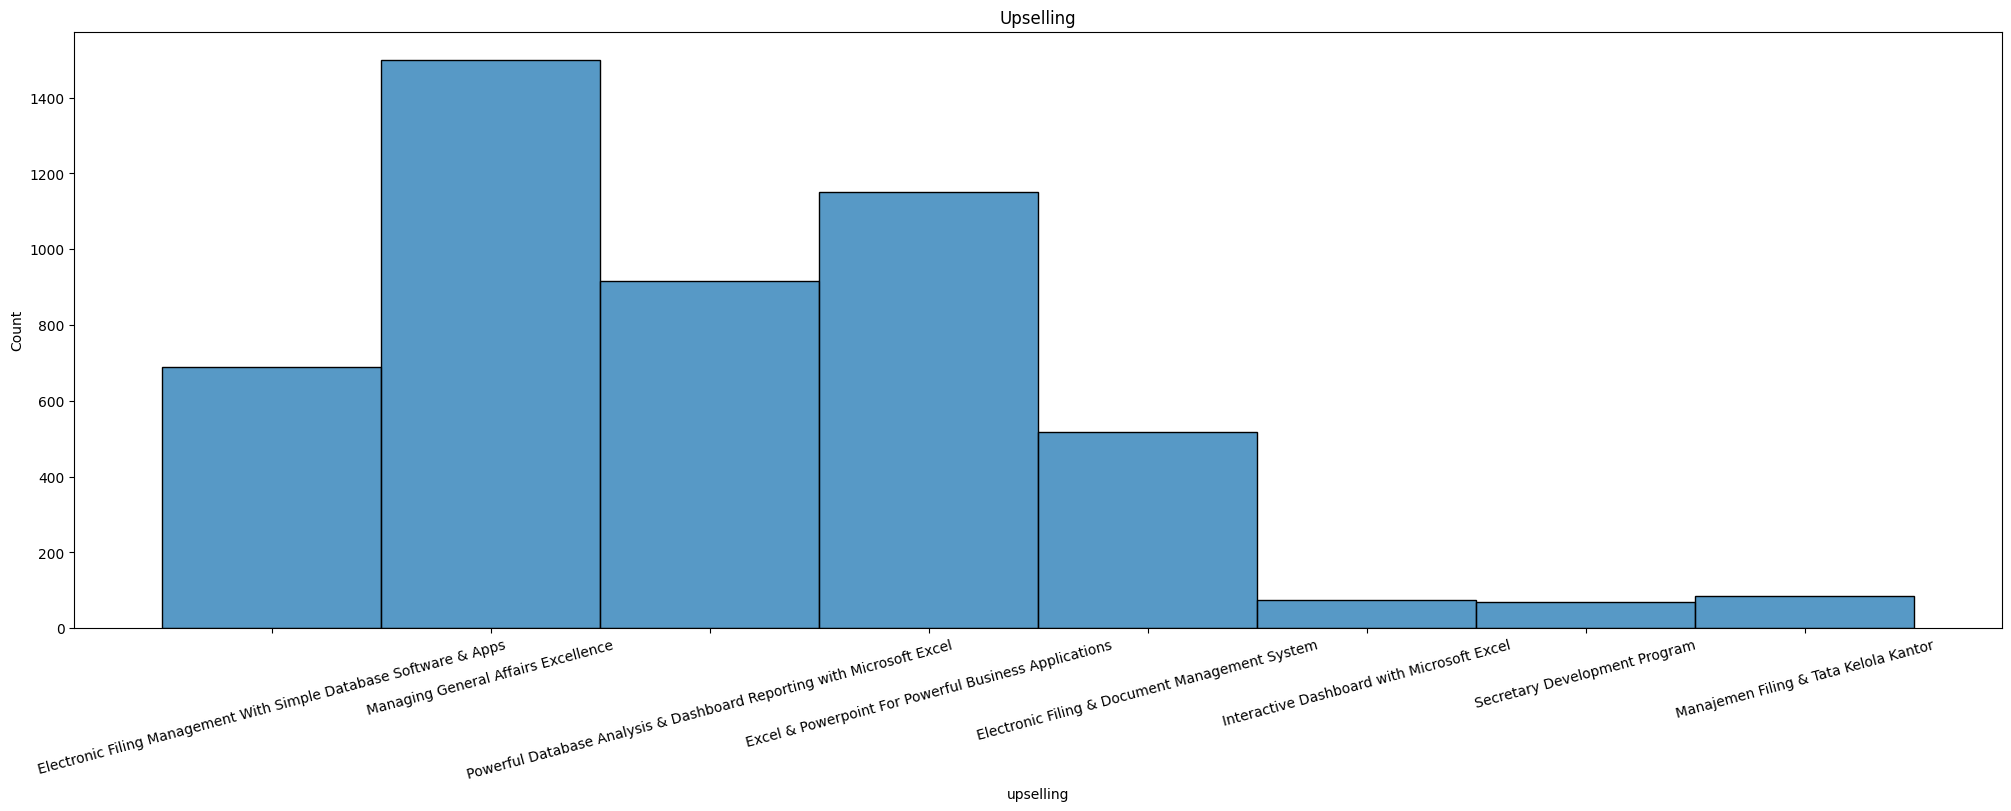

Managing General Affairs Excellence                                      1499
Excel & Powerpoint For Powerful Business Applications                    1150
Powerful Database Analysis & Dashboard Reporting with Microsoft Excel     915
Electronic Filing Management With Simple Database Software & Apps         689
Electronic Filing & Document Management System                            519
Manajemen Filing & Tata Kelola Kantor                                      85
Interactive Dashboard with Microsoft Excel                                 75
Secretary Development Program                                              68
Name: upselling, dtype: int64


In [5]:
# Upselling
fig, ax = plt.subplots(figsize=(20, 8), layout="constrained")
sns.histplot(data=df["upselling"], ax=ax)
ax.set_title("Upselling")
plt.xticks(rotation=15)
plt.show()
print(df["upselling"].value_counts())